# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Make base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# Set inital counters
sets = 1
count = 0
reset = 0

# Make empty lists and fill data as we loop
filtered_cities =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
response_weather_json = []


# Loop through each city
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    
    # Build query url for each city
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    # Check to see if city is found. If it isn't skip city
    if weather_json['cod'] == '404':
        print('City not found. Skipping...')

    # If city is found append data to response list
    else:
        count += 1
        print(f"Processing Record {count} of Set {sets} | {city}")
        
        filtered_cities.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        response_weather_json.append(weather_json)
        
    
    # Every 50 API pulls pause for a minute so that we don't lock our account with OpenWeather
    reset += 1
    if reset == 50:
        time.sleep(60)
        sets += 1
        count = 0
        reset = 0

print('-----------------------------')
print('Data Retrieval Complete')     
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vardo
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | kolvereid
Processing Record 5 of Set 1 | faya
Processing Record 6 of Set 1 | lichuan
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | los corrales de buelna
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | gushikawa
Processing Record 11 of Set 1 | adrar
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | raisen
Processing Record 15 of Set 1 | ilhabela
City not found. Skipping...
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | noumea
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | mehamn
Processing Record 22 of Set 1 | hauterive
Processing Reco

Processing Record 3 of Set 5 | bulawayo
Processing Record 4 of Set 5 | russell
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | joigny
Processing Record 7 of Set 5 | kodinsk
Processing Record 8 of Set 5 | chokurdakh
Processing Record 9 of Set 5 | charters towers
Processing Record 10 of Set 5 | mugumu
Processing Record 11 of Set 5 | dingle
Processing Record 12 of Set 5 | daru
Processing Record 13 of Set 5 | tyukhtet
Processing Record 14 of Set 5 | iralaya
Processing Record 15 of Set 5 | grand-santi
Processing Record 16 of Set 5 | port blair
Processing Record 17 of Set 5 | loukhi
Processing Record 18 of Set 5 | olafsvik
Processing Record 19 of Set 5 | sabang
Processing Record 20 of Set 5 | airai
Processing Record 21 of Set 5 | chapais
Processing Record 22 of Set 5 | phuket
Processing Record 23 of Set 5 | cobourg
Processing Record 24 of Set 5 | hambantota
Processing Record 25 of Set 5 | kaitangata
Processing Record 26 of Set 5 | hithadhoo
Processing Record 27 of Set 5

Processing Record 6 of Set 9 | dunedin
Processing Record 7 of Set 9 | buraydah
Processing Record 8 of Set 9 | guerrero negro
Processing Record 9 of Set 9 | nouakchott
Processing Record 10 of Set 9 | changji
Processing Record 11 of Set 9 | ixtapa
Processing Record 12 of Set 9 | pisco
City not found. Skipping...
Processing Record 13 of Set 9 | manzanillo
Processing Record 14 of Set 9 | doha
Processing Record 15 of Set 9 | jasper
Processing Record 16 of Set 9 | varangaon
Processing Record 17 of Set 9 | filadelfia
City not found. Skipping...
Processing Record 18 of Set 9 | yatou
Processing Record 19 of Set 9 | saint-joseph
Processing Record 20 of Set 9 | vagur
Processing Record 21 of Set 9 | portland
Processing Record 22 of Set 9 | edgewater
Processing Record 23 of Set 9 | itoman
City not found. Skipping...
Processing Record 24 of Set 9 | tak
Processing Record 25 of Set 9 | astaneh-ye ashrafiyeh
Processing Record 26 of Set 9 | a coruna
Processing Record 27 of Set 9 | margate
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({
    'City': filtered_cities,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed,
    })
weather_df.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vardø,40,NO,1588185189,86,70.37,31.11,28.40,11.41
1,Albany,99,US,1588184959,53,42.60,-73.97,60.01,3.00
2,Ushuaia,99,AR,1588184915,70,-54.80,-68.30,46.40,19.46
3,Kolvereid,10,NO,1588185190,45,64.87,11.60,48.20,9.17
4,Faya,87,SA,1588185190,68,18.39,42.45,69.80,4.70


In [6]:
# Export dataframe to csv file in folder output_data
weather_df.to_csv(output_data_file, index = False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

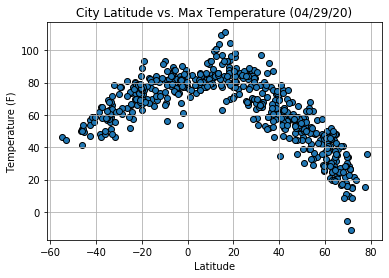

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolors='black')

from datetime import date
today = date.today()
today_formatted = today.strftime("%m/%d/%y")

# Incorporate the other graph properties
date = today.strftime("%m/%d/%y")
plt.title(f"City Latitude vs. Max Temperature ({today_formatted})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1")

plt.show()

From this plot we can see that those cities located around the 0 latitude (Equator) experience the highest max temps over any other cities. Max temps for cities decrese the further you get away from the Equator and the closer you get the north and south poles. There are more cities in the northern hemisphere due to land mass which is why there is more data points on positive latitudes.

#### Latitude vs. Humidity Plot

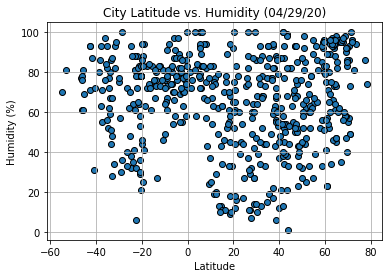

In [29]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2")

plt.show()

From this plot it looks hard to distinguish if there is a relationship between latitude and humidity since the data points are scattered.

#### Latitude vs. Cloudiness Plot

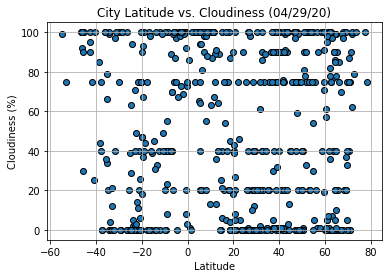

In [30]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3")

plt.show()

This plot shows for the most of the citites with the same latitude that cloudiness varies from 0 to 100.

#### Latitude vs. Wind Speed Plot

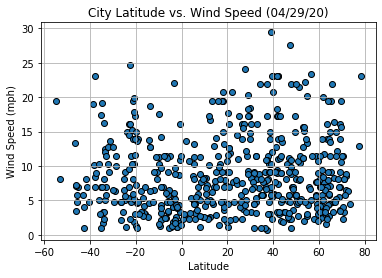

In [31]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4")

plt.show()

This plot shows that wind speeds vary for cities of the same latitude making it hard to determine if there is a correlation. Cities further to the north might experience greater wind speeds however data might be skewed due to there being more data points for the northern hemisphere.

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg_plt(x_values, y_values,x_label,y_label,x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather_df.loc[weather_df["Lat"] >= 0, :]
northern_hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vardø,40,NO,1588185189,86,70.37,31.11,28.40,11.41
1,Albany,99,US,1588184959,53,42.60,-73.97,60.01,3.00
3,Kolvereid,10,NO,1588185190,45,64.87,11.60,48.20,9.17
4,Faya,87,SA,1588185190,68,18.39,42.45,69.80,4.70
5,Lichuan,100,CN,1588185190,68,30.30,108.85,58.28,3.33


In [17]:
southern_hemisphere_df = weather_df.loc[weather_df["Lat"] < 0, :]
southern_hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Ushuaia,99,AR,1588184915,70,-54.80,-68.30,46.4,19.46
6,Alice Springs,5,AU,1588185190,35,-23.70,133.88,57.2,14.99
8,Carnarvon,63,AU,1588185190,32,-24.87,113.63,66.2,9.17
11,Arraial do Cabo,0,BR,1588185191,61,-22.97,-42.03,80.6,16.11
12,Hobart,90,AU,1588185122,93,-42.88,147.33,57.0,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8840321392464987


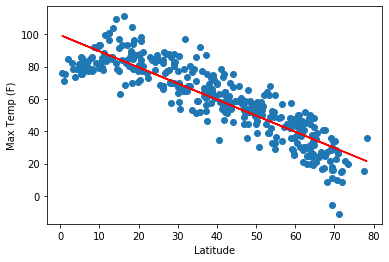

<Figure size 432x288 with 0 Axes>

In [32]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp (F)'
x = 5
y = -20

lin_reg_plt(x_values, y_values,x_label,y_label,x,y)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7597761347355079


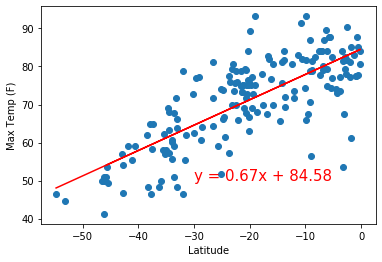

In [19]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp (F)'
x = -30
y = 50

lin_reg_plt(x_values, y_values,x_label,y_label,x,y)

The linear regressions and high R values for each of the plots show there is a strong correlation between the latitude of a city and their max temps. Northern hemishpere has negative correlation (more positive the latitude the lower the max temp) due more positive latitudes representing a move away from the equator and the southern has a positive correlation (more positive the latitude the greater the max temp) due more positive latitudes representing a move to the equator. The southern hemisphere I believe would have even a sstronger correlation if we had gotten more data points. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19069081398428914


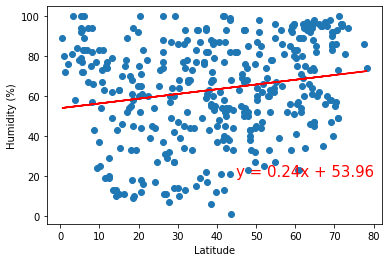

In [20]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
x = 45
y = 20

lin_reg_plt(x_values, y_values,x_label,y_label,x,y)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11506020126649694


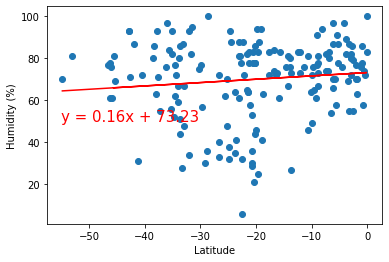

In [21]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
x = -55
y = 50

lin_reg_plt(x_values, y_values,x_label,y_label,x,y)

Both hemispheres had a decent positive correlation between the humidity and latitude. For lower latitudes the data was more spreadout but as the latitudes increase we see that the average humidity increases as well. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.022480187890925533


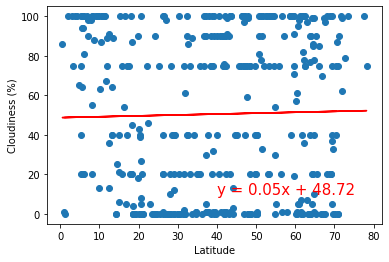

In [22]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
x = 40
y = 10

lin_reg_plt(x_values,y_values,x_label,y_label,x,y)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12065764642077362


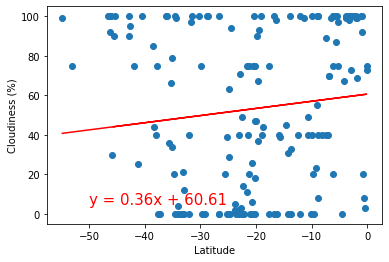

In [23]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
x = -50
y = 5

lin_reg_plt(x_values,y_values,x_label,y_label,x,y)

For both hemipsheres the cloudiness had no correlation with their latitudes as shown by the R squared values. City latitudes did not effect cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06110167243697574


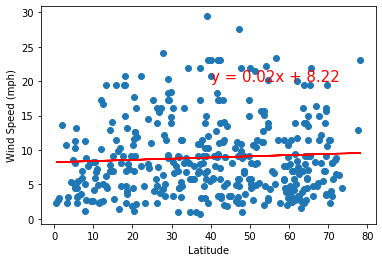

In [25]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
x = 40
y = 20

lin_reg_plt(x_values,y_values,x_label,y_label,x,y)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1659621670782487


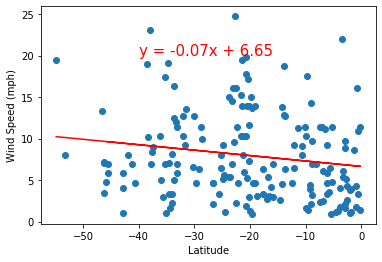

In [26]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
x = -40
y = 20

lin_reg_plt(x_values,y_values,x_label,y_label,x,y)

Wind speeds and latitudes had very weak to no correlation either as shown by their R squared values. 

1. Max temperatures were highest for cities closer to the equator (0 Latitude) and decresed as we got got further away from it for both hemispheres.
2. Humidity and latitude had a decent correlation. The further north you go the more likely the humidity will be higher regardless of which hemishpere you are in. This is expecially true for the northern hemisphere.
3. Cloudiness and windspeed do not correlate with latitude bot for bith hemispheres.